In [1]:
## Init
from oneibl.one import ONE
from ibllib.misc import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

one = ONE() # need to instantiate the class to have the API.

In [2]:
## In this case we just lookup the session using the date
eid, ses = one.search(users='olivier', date_range=['2018-08-24', '2018-08-24'], details=True)
pprint(eid)


[
    "https://test.alyx.internationalbrainlab.org/sessions/86e27228-8708-48d8-96ed-9aa61ab951db"
]


In [3]:
## Now lists the available datasets for this EID
print(one.list(eid[0]))

['_ibl_lickPiezo.raw', '_ibl_lickPiezo.timestamps', '_ibl_wheel.position', 'channels.brainLocation', 'channels.probe', 'channels.rawRow', 'channels.site', 'channels.sitePositions', 'clusters._phy_annotation', 'clusters.depths', 'clusters.peakChannel', 'clusters.probes', 'clusters.templateWaveforms', 'clusters.waveformDuration', 'eye.area', 'eye.blink', 'eye.timestamps', 'eye.xyPos', 'licks.times', 'probes.description', 'probes.insertion', 'probes.rawFilename', 'probes.sitePositions', 'spikes.amps', 'spikes.clusters', 'spikes.depths', 'spikes.times', 'spontaneous.intervals', 'unknown']


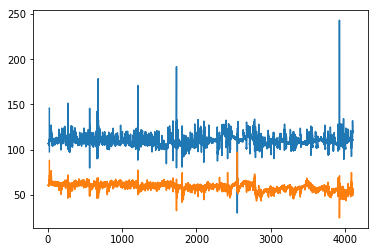

In [4]:
## And then load a couple of datasets
xy, t = one.load(eid[0], dataset_types=['eye.xyPos', 'eye.timestamps'])
plt.plot(t[:,1], xy)

In [5]:
## Loads some spike data
st, sa = one.load(eid[0], dataset_types=['spikes.times', 'spikes.amps'])

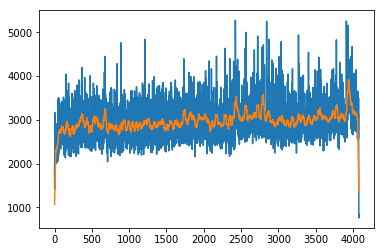

In [6]:
## Plot spikes density accross the whole experiment with/without running average
bc = np.bincount(np.int64(st[:,0]-np.min(st[:,0])))
t = np.linspace(0,np.double(bc.size)/86400, bc.size)

ts = pd.Series(bc, t)
plt.plot(t*86400, bc)
plt.plot(t*86400, np.convolve(np.ones(30)/30, bc, 'same'))